In [1]:
import matplotlib.pyplot as plt
import cv2

## *checking the data*

In [2]:
hap = cv2.imread('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/train/happiness/KM.HA4.7.tiff')
hap = cv2.cvtColor(hap,cv2.COLOR_BGR2RGB)

In [3]:
type(hap)

numpy.ndarray

In [4]:
hap.shape

(256, 256, 3)

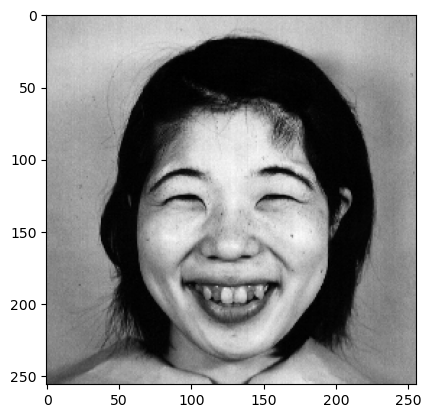

In [5]:
plt.imshow(hap);

In [6]:
dis = cv2.imread('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/train/disgust/KL.DI4.173.tiff')
dis = cv2.cvtColor(dis,cv2.COLOR_BGR2RGB)

In [7]:
type(dis)

numpy.ndarray

In [8]:
dis.shape

(256, 256, 3)

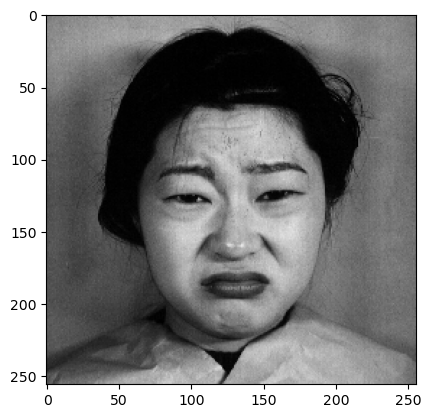

In [9]:
plt.imshow(dis);

## *preprocessing the data*

In [10]:
from keras.preprocessing.image import ImageDataGenerator

2025-02-06 12:00:59.150816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',
                              )

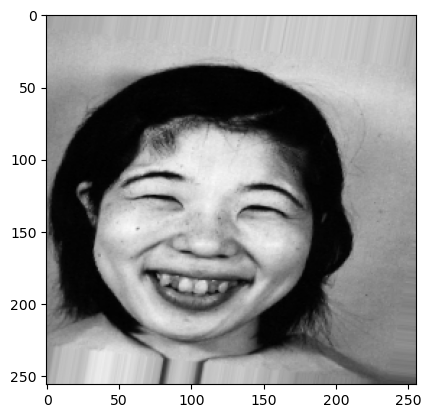

In [25]:
plt.imshow(image_gen.random_transform(hap));

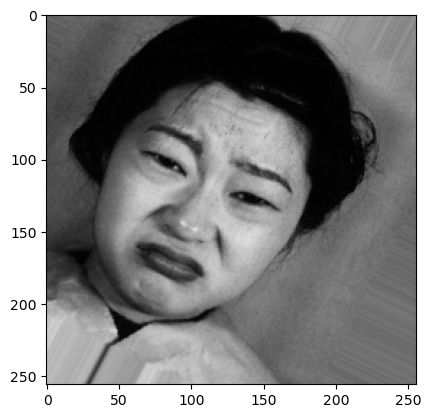

In [26]:
plt.imshow(image_gen.random_transform(dis));

In [27]:
image_gen.flow_from_directory('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/train')

Found 166 images belonging to 7 classes.


In [28]:
image_gen.flow_from_directory('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/test')

Found 47 images belonging to 7 classes.


In [37]:
image_shape = (150,150,1)

In [30]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [39]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/train',
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='grayscale')

Found 166 images belonging to 7 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory('/Volumes/JavaAOT/Documents/AI/ml_expressions/img_datasets/jaffe_dataset_split/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               color_mode='grayscale')

Found 47 images belonging to 7 classes.


In [41]:
train_image_gen.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
results = model.fit(train_image_gen,epochs=100,
                    steps_per_epoch=1,
                    validation_data=test_image_gen,
                    validation_steps=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6969 - accuracy: 0.5000 - val_loss: 0.4488 - val_accuracy: 0.8571
Epoch 2/100
1/1 [==============================] - 1s 519ms/step - loss: 0.4441 - accuracy: 0.8571 - val_loss: 0.4184 - val_accuracy: 0.8571
Epoch 3/100
1/1 [==============================] - 0s 472ms/step - loss: 0.4164 - accuracy: 0.8571 - val_loss: 0.4126 - val_accuracy: 0.8571
Epoch 4/100
1/1 [==============================] - 0s 468ms/step - loss: 0.4192 - accuracy: 0.8571 - val_loss: 0.4197 - val_accuracy: 0.8571
Epoch 5/100
1/1 [==============================] - 0s 470ms/step - loss: 0.4392 - accuracy: 0.8571 - val_loss: 0.4144 - val_accuracy: 0.8571
Epoch 6/100
1/1 [==============================] - 0s 440ms/step - loss: 0.4174 - accuracy: 0.8571 - val_loss: 0.4213 - val_accuracy: 0.8571
Epoch 7/100
1/1 [==============================] - 0s 461ms/step - loss: 0.4316 - accuracy: 0.8571 - val_loss: 0.4164 - val_accuracy: 0.8571
Epoch 8/100
1/1 